#Importing Libraries

In [1]:
#basic import
import numpy as np 
import pandas as pd
# import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
import warnings


#Data Preprocessing

In [2]:
#importing dataset
dataset = pd.read_csv('student-mat.csv')
# dataset = dataset.drop(columns=['G3'],axis=1) not needed as we are dropping last column in below line
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[['GP' 'F' 18 ... 6 5 6]
 ['GP' 'F' 17 ... 4 5 5]
 ['GP' 'F' 15 ... 10 7 8]
 ...
 ['MS' 'M' 21 ... 3 10 8]
 ['MS' 'M' 18 ... 0 11 12]
 ['MS' 'M' 19 ... 5 8 9]]


In [4]:
print(y)

[ 6  6 10 15 10 15 11  6 19 15  9 12 14 11 16 14 14 10  5 10 15 15 16 12
  8  8 11 15 11 11 12 17 16 12 15  6 18 15 11 13 11 12 18 11  9  6 11 20
 14  7 13 13 10 11 13 10 15 15  9 16 11 11  9  9 10 15 12  6  8 16 15 10
  5 14 11 10 10 11 10  5 12 11  6 15 10  8  6 14 10  7  8 18  6 10 14 10
 15 10 14  8  5 17 14  6 18 11  8 18 13 16 19 10 13 19  9 16 14 13  8 13
 15 15 13 13  8 12 11  9  0 18  0  0 12 11  0  0  0  0 12 15  0  9 11 13
  0 11  0 11  0 10  0 14 10  0 12  8 13 10 15 12  0  7  0 10  7 12 10 16
  0 14  0 16 10  0  9  9 11  6  9 11  8 12 17  8 12 11 11 15  9 10 13  9
  8 10 14 15 16 10 18 10 16 10 10  6 11  9  7 13 10  7  8 13 14  8 10 15
  4  8  8 10  6  0 17 13 14  7 15 12  9 12 14 11  9 13  6 10 13 12 11  0
 12 12  0 12  0 18 13  8  5 15  8 10  8  8 12  8 13 11 14  0 18  8 12  9
  0 17 10 11 10  0  9 14 11 14 10 12  9  9  8 10  8 10 12 10 11 11 19 12
 14 15 11 15 13 18 14 11  0  8 14 16 11 10 14 18 13 12 18  8 12 10  0 13
 11 11 13 11  0  9 10 11 13  9 11 15 15 11 16 10  9

#Preparing X and Y variables

In [5]:
print("Categories in 'school' variable:     ",end=" " )
print(dataset['school'].unique())

print("Categories in 'sex' variable:     ",end=" " )
print(dataset['sex'].unique())

print("Categories in 'age' variable:  ",end=" ")
print(dataset['age'].unique())



Categories in 'school' variable:      ['GP' 'MS']
Categories in 'sex' variable:      ['F' 'M']
Categories in 'age' variable:   [18 17 15 16 19 22 20 21]


In [6]:
X[0,:]

array(['GP', 'F', 18, 'U', 'GT3', 'A', 4, 4, 'at_home', 'teacher',
       'course', 'mother', 2, 2, 0, 'yes', 'no', 'no', 'no', 'yes', 'yes',
       'no', 'no', 4, 3, 4, 1, 1, 3, 6, 5, 6], dtype=object)

In [7]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Manually specify categorical and numerical indices
cat_indices = [0, 1, 3, 4, 5, 8, 9, 10, 11, 15, 16, 17, 18, 19, 20, 21, 22, 23]
num_indices = [2, 6, 7, 12, 13, 14, 24, 25, 26, 27, 28, 29, 30, 31]

# Extract categorical and numerical columns
X_cat = X[:, cat_indices]
X_num = X[:, num_indices].astype(float)  # Convert numerical columns to float

# Apply OneHotEncoder on categorical data
oh_encoder = OneHotEncoder(sparse_output=False)  # Set sparse_output to False to get dense array
X_cat_encoded = oh_encoder.fit_transform(X_cat)

# Apply StandardScaler on numerical data
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# Combine transformed data
X_preprocessed = np.hstack([X_cat_encoded, X_num_scaled])

# Print the transformed array
print("Shape of preprocessed X:", X_preprocessed.shape)
print(X_preprocessed)


Shape of preprocessed X: (395, 62)
[[ 1.          0.          1.         ...  0.03642446 -1.78246688
  -1.25479105]
 [ 1.          0.          1.         ... -0.21379577 -1.78246688
  -1.52097927]
 [ 1.          0.          1.         ...  0.53686493 -1.1791469
  -0.72241461]
 ...
 [ 0.          1.          0.         ... -0.33890588 -0.27416693
  -0.72241461]
 [ 0.          1.          0.         ... -0.71423623  0.02749306
   0.34233827]
 [ 0.          1.          0.         ... -0.08868565 -0.87748691
  -0.45622639]]


In [8]:
#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((316, 62), (79, 62))

In [9]:
#Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    # "XGBRegressor": XGBRegressor(), 
    # "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1.6756
- Mean Absolute Error: 1.1709
- R2 Score: 0.8663
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.3729
- Mean Absolute Error: 1.6396
- R2 Score: 0.7254


Lasso
Model performance for Training set
- Root Mean Squared Error: 2.1665
- Mean Absolute Error: 1.3234
- R2 Score: 0.7765
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.2270
- Mean Absolute Error: 1.4186
- R2 Score: 0.7581


Ridge
Model performance for Training set
- Root Mean Squared Error: 1.6758
- Mean Absolute Error: 1.1672
- R2 Score: 0.8663
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.3674
- Mean Absolute Error: 1.6343
- R2 Score: 0.7267


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2.3070
- Mean Absolute Error: 1.7133
- R2 Score: 0.7466
-----------------------

In [ ]:
#Results
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

In [11]:
#Linear Regression
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 72.54


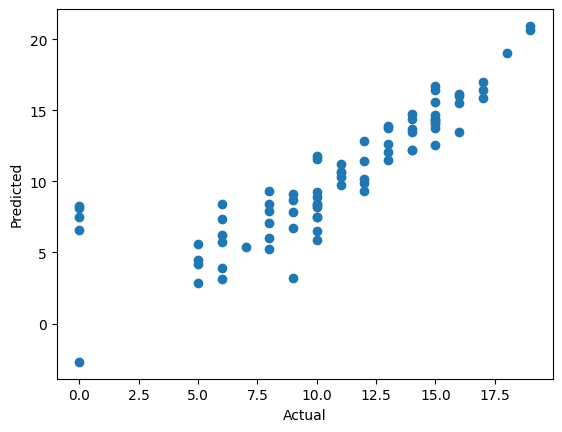

In [12]:
#Plot y_pred and y_test
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

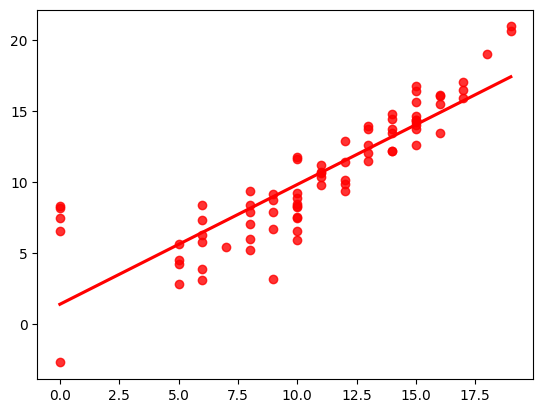

In [13]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [14]:
#Difference between Actual and Predicted Values
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
0,10,5.892578,4.107422
1,12,11.412109,0.587891
2,5,2.824219,2.175781
3,10,8.875000,1.125000
4,9,8.693359,0.306641
...,...,...,...
74,12,10.146484,1.853516
75,6,6.234375,-0.234375
76,9,7.849609,1.150391
77,15,12.574219,2.425781
